In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

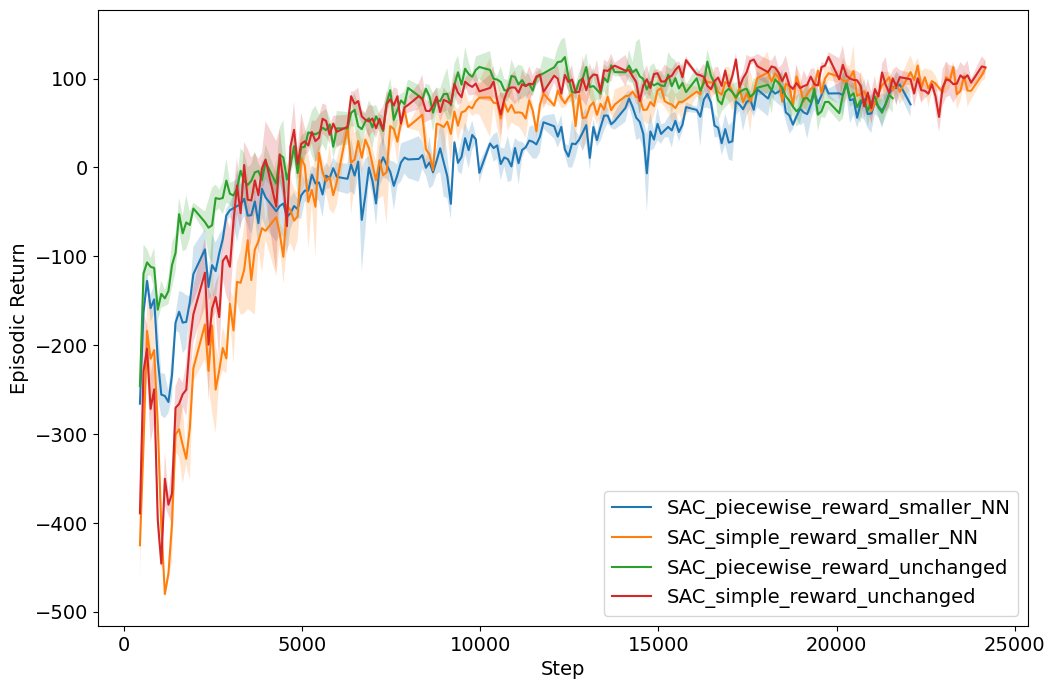

In [22]:
# read csv file
result_dir = '/home/hieule/research/saris/local_assets/results'
# read all csv files in the result directory
csv_files = glob.glob(os.path.join(result_dir, '*.csv'))
dfs = [pd.read_csv(f) for f in csv_files]

# plot the results with standard deviation
fig, ax = plt.subplots(figsize=(12, 8))
for i, df in enumerate(dfs):
    # get the file name without extension
    file_name = os.path.basename(csv_files[i]).split('/')[-1].split('.')[0]
    ax.plot(df['Step'], df['episodic_return'], label=file_name)
    ax.fill_between(df['Step'], df['episodic_return'] - df['episodic_return_std'], df['episodic_return'] + df['episodic_return_std'], alpha=0.2)
ax.legend(loc='lower right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Episodic Return', fontsize=14)
plt.show()

In [16]:
# Get the average for the first 15 data points from all dfs
average = np.mean([df['episodic_return'][0:30] for df in dfs], axis=0)
average

array([-265.85301475, -163.20037032, -127.70503089, -158.32576182,
       -148.48372556, -215.96547892, -255.68271733, -257.17805484,
       -264.00403976, -233.61895752, -174.70637418, -162.451766  ,
       -174.66358947, -173.84586048, -151.56669331, -120.00716974,
        -92.20942282, -134.59117414, -109.96170901, -116.67693616,
       -122.88190268,  -96.65978909,  -89.35549165,  -81.02547216,
        -80.41392421,  -54.05547334,  -56.676005  ,  -40.79483367,
        -47.97683954,  -58.15515638])

In [3]:
df.head()

,Step,episodic_return,episodic_return_std
0,450,-2.537273,11.161243
1,550,8.595285,10.137773
2,650,-16.118662,9.395597
3,750,-34.405617,15.180985
4,850,-25.554798,16.517860


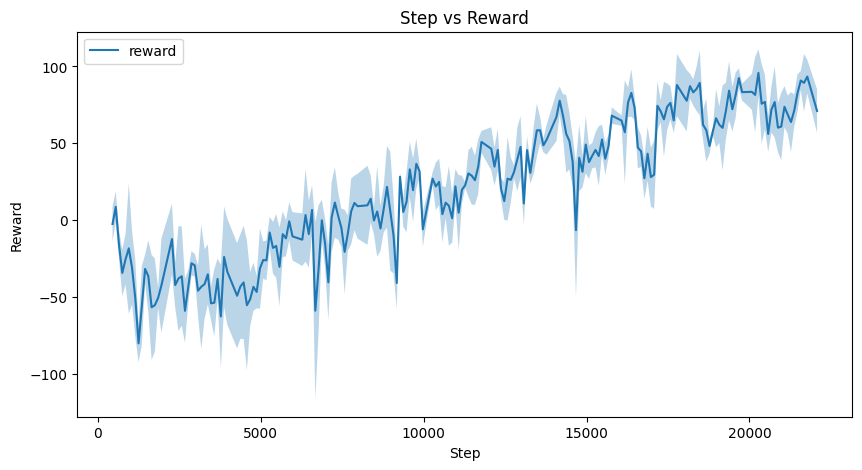

In [6]:
# plot step vs reward with standard deviation in line plot
plt.figure(figsize=(10, 5))
plt.plot(df['Step'], df['episodic_return'], label='reward')
plt.fill_between(df['Step'], df['episodic_return'] - df['episodic_return_std'], df['episodic_return'] + df['episodic_return_std'], alpha=0.3)
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Step vs Reward')
plt.legend()
plt.show()


## Path Gain

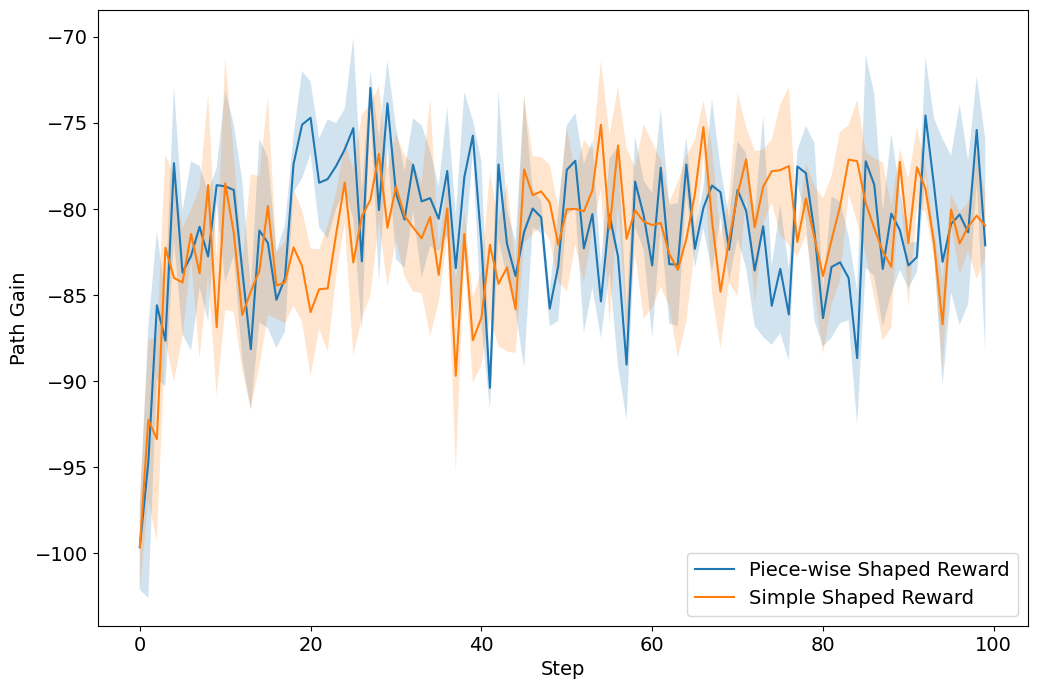

In [ ]:
path_gain_file1 = '/home/hieule/research/saris/local_assets/results/EVAL_SAC_Shaped_Reward_Bounded__Changed_NN__wireless-sigmap-v0__d8563e64/all_path_gains.npy'
path_gain_file2 = '/home/hieule/research/saris/local_assets/results/SAC_Simple_Reward_Bounded__Unchanged_NN__wireless-sigmap-v0__d62863eb/all_path_gains.npy'

# plot both path gains with standard deviation
path_gain1 = np.load(path_gain_file1)
path_gain2 = np.load(path_gain_file2)

# path_gain1 = np.swapaxes(path_gain1, 0, 1)
path_gain_mean1 = path_gain1.mean(axis=-1)
all_path_gain_mean1 = path_gain_mean1.mean(axis=-1)
all_path_gain_std1 = path_gain_mean1.std(axis=-1)

# path_gain2 = np.swapaxes(path_gain2, 0, 1)
path_gain_mean2 = path_gain2.mean(axis=-1)
all_path_gain_mean2 = path_gain_mean2.mean(axis=-1)
all_path_gain_std2 = path_gain_mean2.std(axis=-1)

# plot the results with standard deviation
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(all_path_gain_mean1, label='Piece-wise Shaped Reward')
ax.fill_between(np.arange(path_gain1.shape[0]), all_path_gain_mean1 - all_path_gain_std1, all_path_gain_mean1 + all_path_gain_std1, alpha=0.2)
ax.plot(all_path_gain_mean2, label='Simple Shaped Reward')
ax.fill_between(np.arange(path_gain2.shape[0]), all_path_gain_mean2 - all_path_gain_std2, all_path_gain_mean2 + all_path_gain_std2, alpha=0.2)
ax.legend(loc='lower right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Path Gain', fontsize=14)
plt.show()
